In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/4039-data/structured_data.json
/kaggle/input/4039-dataset/structured_data.json
/kaggle/input/dataset1/structured_data.json
/kaggle/input/dataset2/structured_data (2).json


In [21]:
%pip install pandas matplotlib mplsoccer

Note: you may need to restart the kernel to use updated packages.


In [22]:
# penalties in matches 2068 and 4039

import pandas as pd
frames = pd.read_json('/kaggle/input/dataset2/structured_data (2).json')
frames.head(25)

,possession,frame,data,period,time
0,"{'trackable_object': None, 'group': None}",0,[],NaN,None
1,"{'trackable_object': None, 'group': None}",1,[],NaN,None
2,"{'trackable_object': None, 'group': None}",2,[],NaN,None
3,"{'trackable_object': None, 'group': None}",3,[],NaN,None
4,"{'trackable_object': None, 'group': None}",4,[],NaN,None
5,"{'trackable_object': None, 'group': None}",5,[],NaN,None
6,"{'trackable_object': None, 'group': None}",6,[],NaN,None
7,"{'trackable_object': None, 'group': None}",7,[],NaN,None
8,"{'trackable_object': None, 'group': None}",8,[],NaN,None
9,"{'trackable_object': None, 'group': None}",9,[],NaN,None


In [23]:
len(frames)

72130

In [24]:
frames.iloc[59999]

possession     {'trackable_object': 8052, 'group': 'home team'}
frame                                                     59999
data          [{'y': 28.5068539969, 'x': 13.6209746006, 'tra...
period                                                      2.0
time                                                   74:43.80
Name: 59999, dtype: object

In [25]:
frames.head()

,possession,frame,data,period,time
0,"{'trackable_object': None, 'group': None}",0,[],NaN,None
1,"{'trackable_object': None, 'group': None}",1,[],NaN,None
2,"{'trackable_object': None, 'group': None}",2,[],NaN,None
3,"{'trackable_object': None, 'group': None}",3,[],NaN,None
4,"{'trackable_object': None, 'group': None}",4,[],NaN,None


In [26]:
frames.iloc[59999].data

[{'y': 28.5068539969,
  'x': 13.6209746006,
  'trackable_object': 55,
  'track_id': -469},
 {'y': 27.200646355,
  'x': 13.805116381,
  'trackable_object': 8052,
  'track_id': 8559},
 {'y': 14.9697811944,
  'x': 6.02015583856,
  'trackable_object': 7680,
  'track_id': 8556},
 {'y': 26.2818010421,
  'x': 3.36338141986,
  'trackable_object': 520,
  'track_id': 8557},
 {'y': -0.606382503008,
  'x': 7.22628840193,
  'trackable_object': 7209,
  'track_id': 8552},
 {'y': -1.52897901762,
  'x': 6.85894130525,
  'trackable_object': 3104,
  'track_id': 8550},
 {'y': 24.169976734,
  'x': 10.2500597182,
  'trackable_object': 1372,
  'track_id': 8533},
 {'y': 16.7545786358,
  'x': 15.936913127,
  'trackable_object': 11322,
  'track_id': 8551},
 {'y': 16.5183845702,
  'x': 17.7980953398,
  'trackable_object': 6717,
  'track_id': 8555},
 {'y': 5.6630351657,
  'x': 21.8538768405,
  'trackable_object': 4023,
  'track_id': 8535},
 {'y': 2.44632924171,
  'x': 0.700453529755,
  'trackable_object': 11180,


In [27]:
frames = frames[["frame","data","time"]]
frames.head()

,frame,data,time
0,0,[],None
1,1,[],None
2,2,[],None
3,3,[],None
4,4,[],None


In [28]:
frames.iloc[59999]

frame                                                59999
data     [{'y': 28.5068539969, 'x': 13.6209746006, 'tra...
time                                              74:43.80
Name: 59999, dtype: object

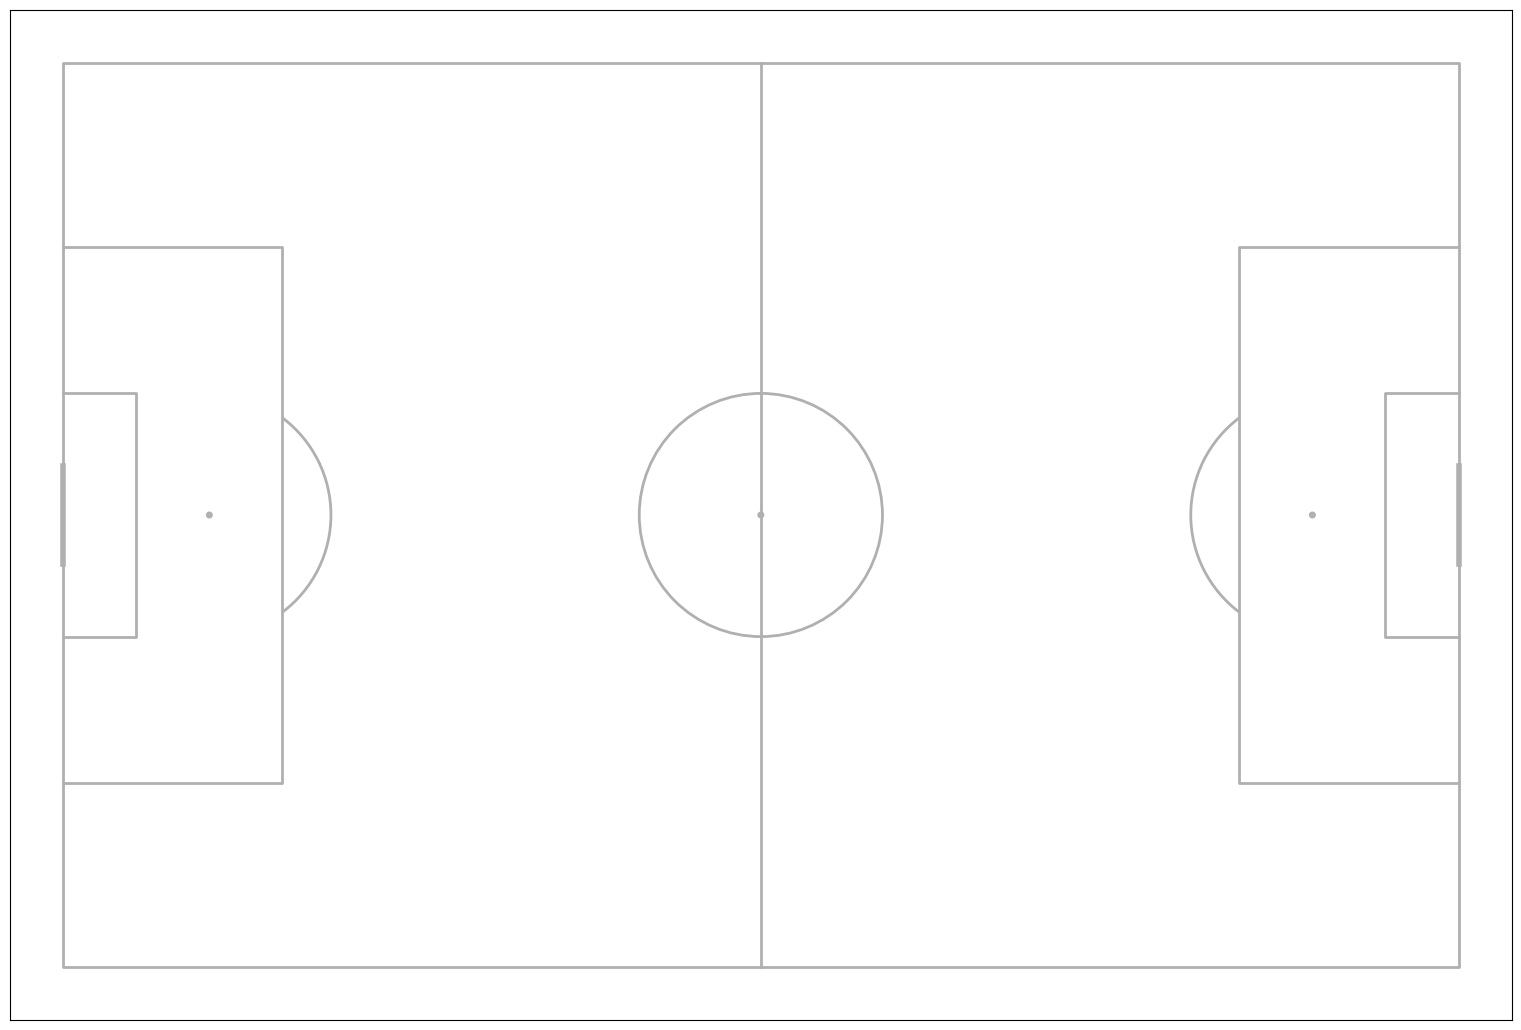

In [29]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch
pitch = Pitch(pitch_type='skillcorner', pitch_length=105, pitch_width=68, axis=True)
fig, ax = pitch.draw(figsize=(16, 10.4))

In [30]:
current_frame = frames[frames.frame == 59999]
current_frame

,frame,data,time
59999,59999,"[{'y': 28.5068539969, 'x': 13.6209746006, 'tra...",74:43.80


In [31]:
print(current_frame.columns)

Index(['frame', 'data', 'time'], dtype='object')


In [32]:
import warnings

# Suppress the runtime warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
data_list = frames.iloc[59999]['data']

# Convert the list of dictionaries into a DataFrame
df_data = pd.DataFrame(data_list)

# Now you can filter the ball and player positions
ball_pos = df_data[df_data['trackable_object'] == 55]
player_pos = df_data[df_data['trackable_object'] != 55]

print(ball_pos)
print(player_pos)

           y          x  trackable_object  track_id
0  28.506854  13.620975                55      -469
            y          x  trackable_object  track_id
1   27.200646  13.805116              8052      8559
2   14.969781   6.020156              7680      8556
3   26.281801   3.363381               520      8557
4   -0.606383   7.226288              7209      8552
5   -1.528979   6.858941              3104      8550
6   24.169977  10.250060              1372      8533
7   16.754579  15.936913             11322      8551
8   16.518385  17.798095              6717      8555
9    5.663035  21.853877              4023      8535
10   2.446329   0.700454             11180      8505
11  29.476147  19.118561              2296      8507
12  22.054717  27.567057              7648      8496


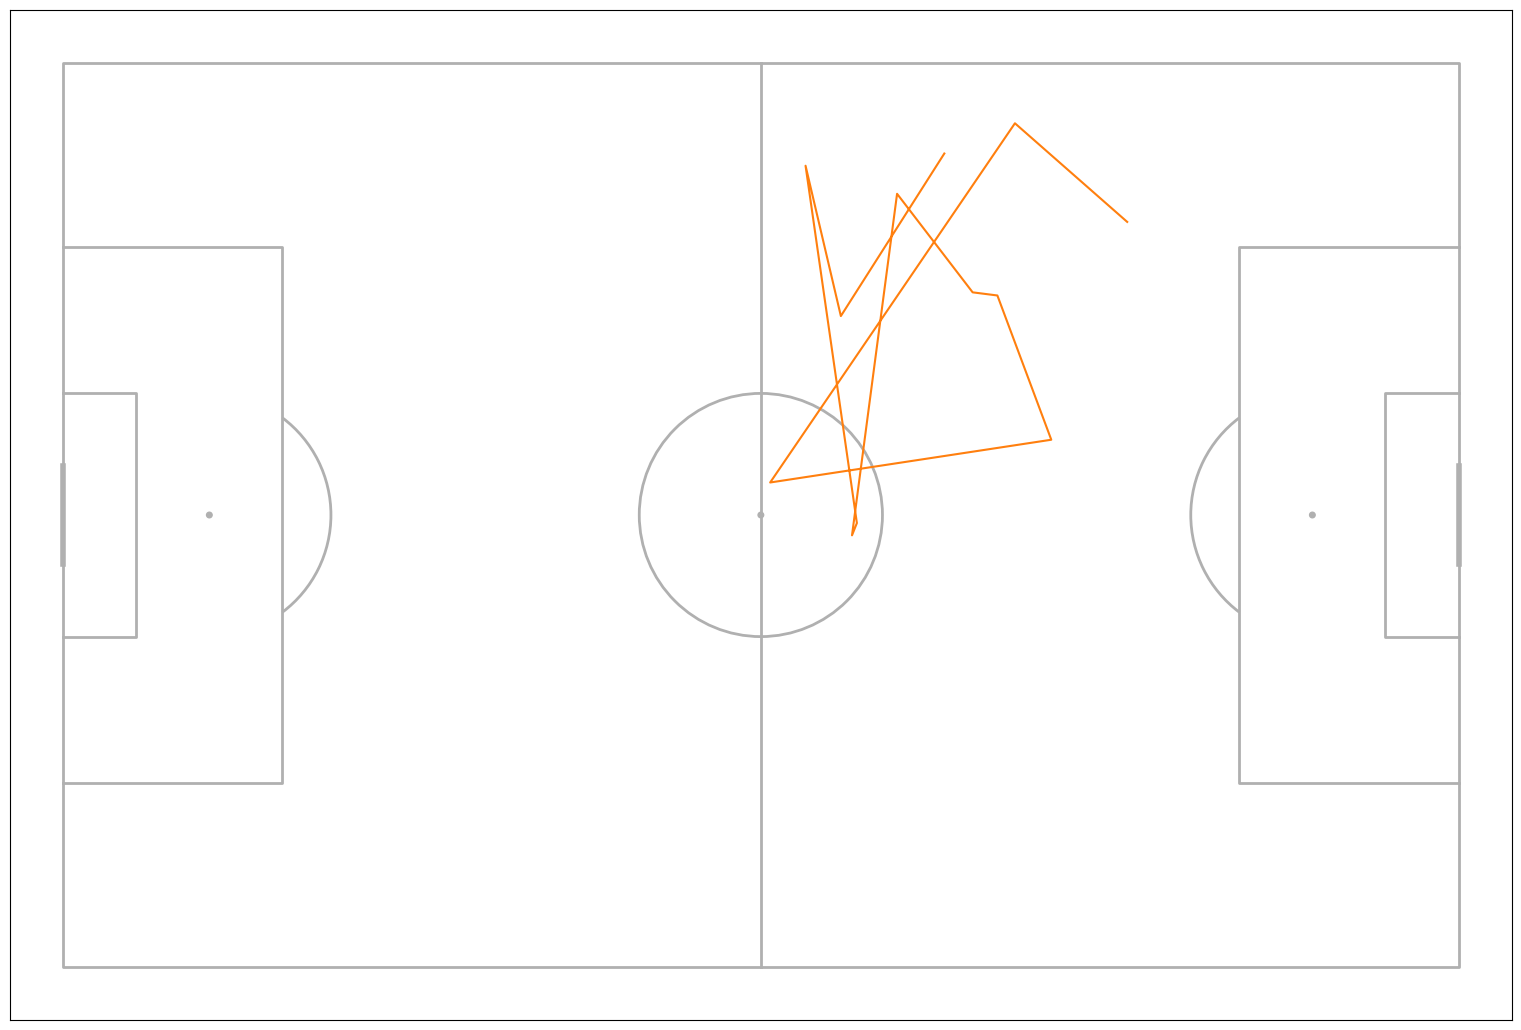

In [33]:
# Now we can see these two on the field. Let's recreate our pitch:
pitch = Pitch(pitch_type='skillcorner', pitch_length=105, pitch_width=68, axis=True)
fig, ax = pitch.draw(figsize=(16, 10.4))

ball, = ax.plot(
 ball_pos['x'],
 ball_pos['y'],
)
players, = ax.plot(
 player_pos['x'],
 player_pos['y'],
)

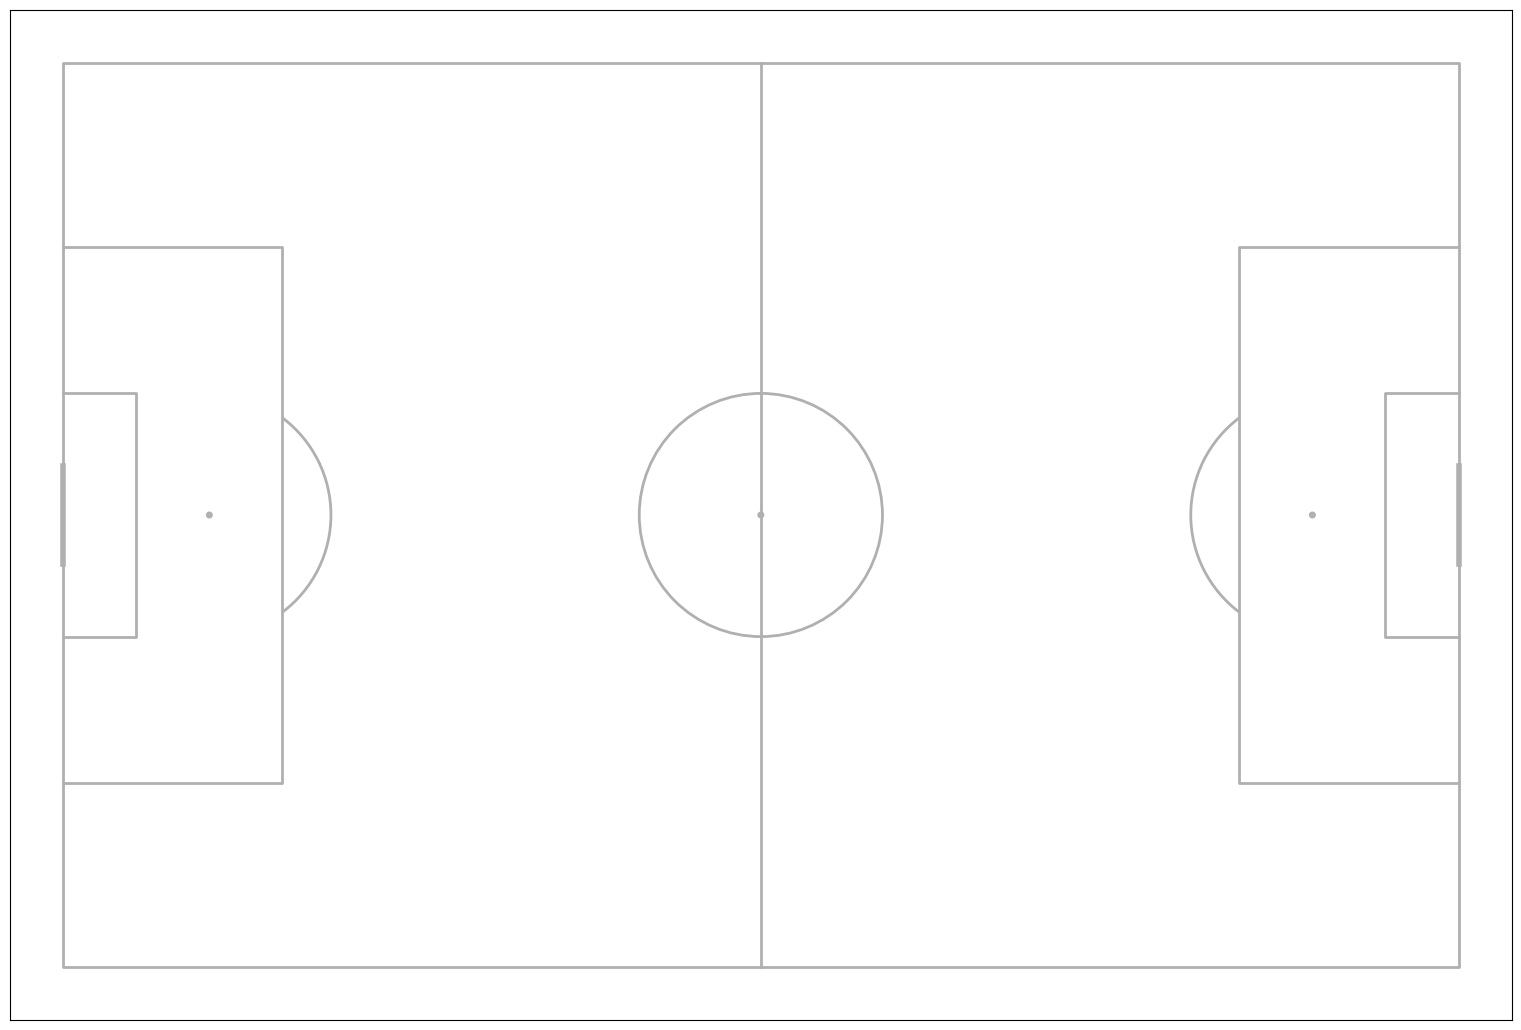

In [34]:
ball.set_linestyle('None')
players.set_linestyle('None')
fig

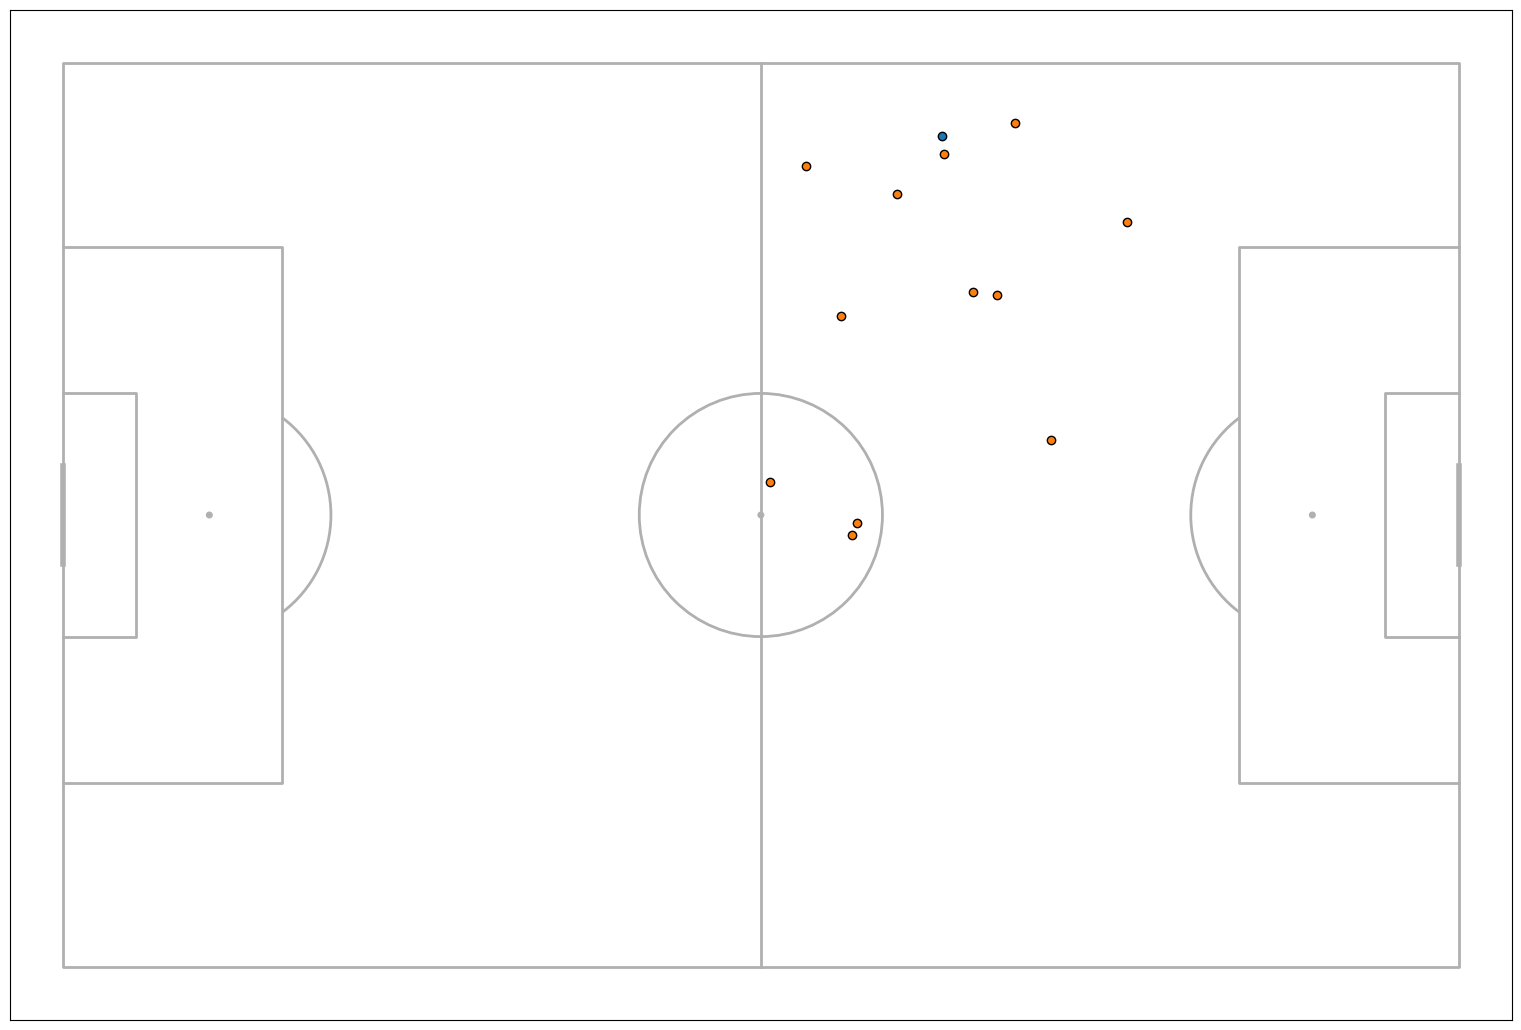

In [35]:
ball.set_marker('o')
ball.set_markeredgecolor('black')
players.set_marker('o')
players.set_markeredgecolor('black')
fig

In [137]:
def plot_frame(f):
 # f represents the frame we want to use, so let's make sure that gets propag
    data_list = frames.iloc[f]['data']

    # Convert the list of dictionaries into a DataFrame
    df_data = pd.DataFrame(data_list)

    ball_pos = df_data[df_data['trackable_object'] == 55]
    player_pos = df_data[df_data['trackable_object'] != 55]
    # Let's recreate our pitch, just to start with a clean slate:
    pitch = Pitch(pitch_type='skillcorner', pitch_length=105, pitch_width=68, axis=True)
    fig, ax = pitch.draw(figsize=(16, 10.4))
    # Now, let's plot the ball:
    ball, = ax.plot(
    ball_pos['x'],
    ball_pos['y'],
    marker="o",
    color="white",
    markersize=6,
    linestyle="None",
    markeredgecolor="black")

    players, = ax.plot(
    player_pos['x'],
    player_pos['y'],)

    players.set_linestyle('None')
    players.set_marker('o')
    players.set_markeredgecolor('black')

    print(frames.iloc[f]['time'])

    return ball, players

In [136]:
def plot_frame2(f):
    try:
        # Get the data for the specified frame
        data_list = frames.iloc[f]['data']
        df_data = pd.DataFrame(data_list)

        # Get ball and player positions
        ball_pos = df_data[df_data['trackable_object'] == 55]
        player_pos = df_data[df_data['trackable_object'] != 55]

        # Create pitch
        pitch = Pitch(pitch_type='skillcorner', pitch_length=105, pitch_width=68, axis=True)
        fig, ax = pitch.draw(figsize=(16, 10.4))

        # Plot ball
        ball, = ax.plot(
            ball_pos['x'],
            ball_pos['y'],
            marker="o",
            color="white",
            markersize=6,
            linestyle="None",
            markeredgecolor="black"
        )

        # Plot players
        players, = ax.plot(
            player_pos['x'],
            player_pos['y'],
            marker="o",
            color="blue",
            linestyle="None",
            markeredgecolor="black"
        )
        return ball, player

        print(f"Successfully plotted frame {f} at time: {frames.iloc[f]['time']}")
        
    except Exception as e:
        print(f"Error plotting frame {f}: {str(e)}")
        return False  # Return False on failure

In [102]:
def find_valid_frame(start_frame=15000):
    current_frame = start_frame
    while True:
        try:
            # Try to access the frame data first
            _ = frames.iloc[current_frame]
            
            # If frame exists, try to plot it
            success = plot_frame(current_frame)
            if success:
                print(f"Found valid frame: {current_frame}")
                break
                
        except IndexError:
            print(f"Frame {current_frame} doesn't exist in the data")
            break
            
        except Exception as e:
            print(f"Unexpected error with frame {current_frame}: {str(e)}")
            
        current_frame += 1  # Move to next frame

Successfully plotted frame 12427 at time: 17:39.40
Found valid frame: 12427


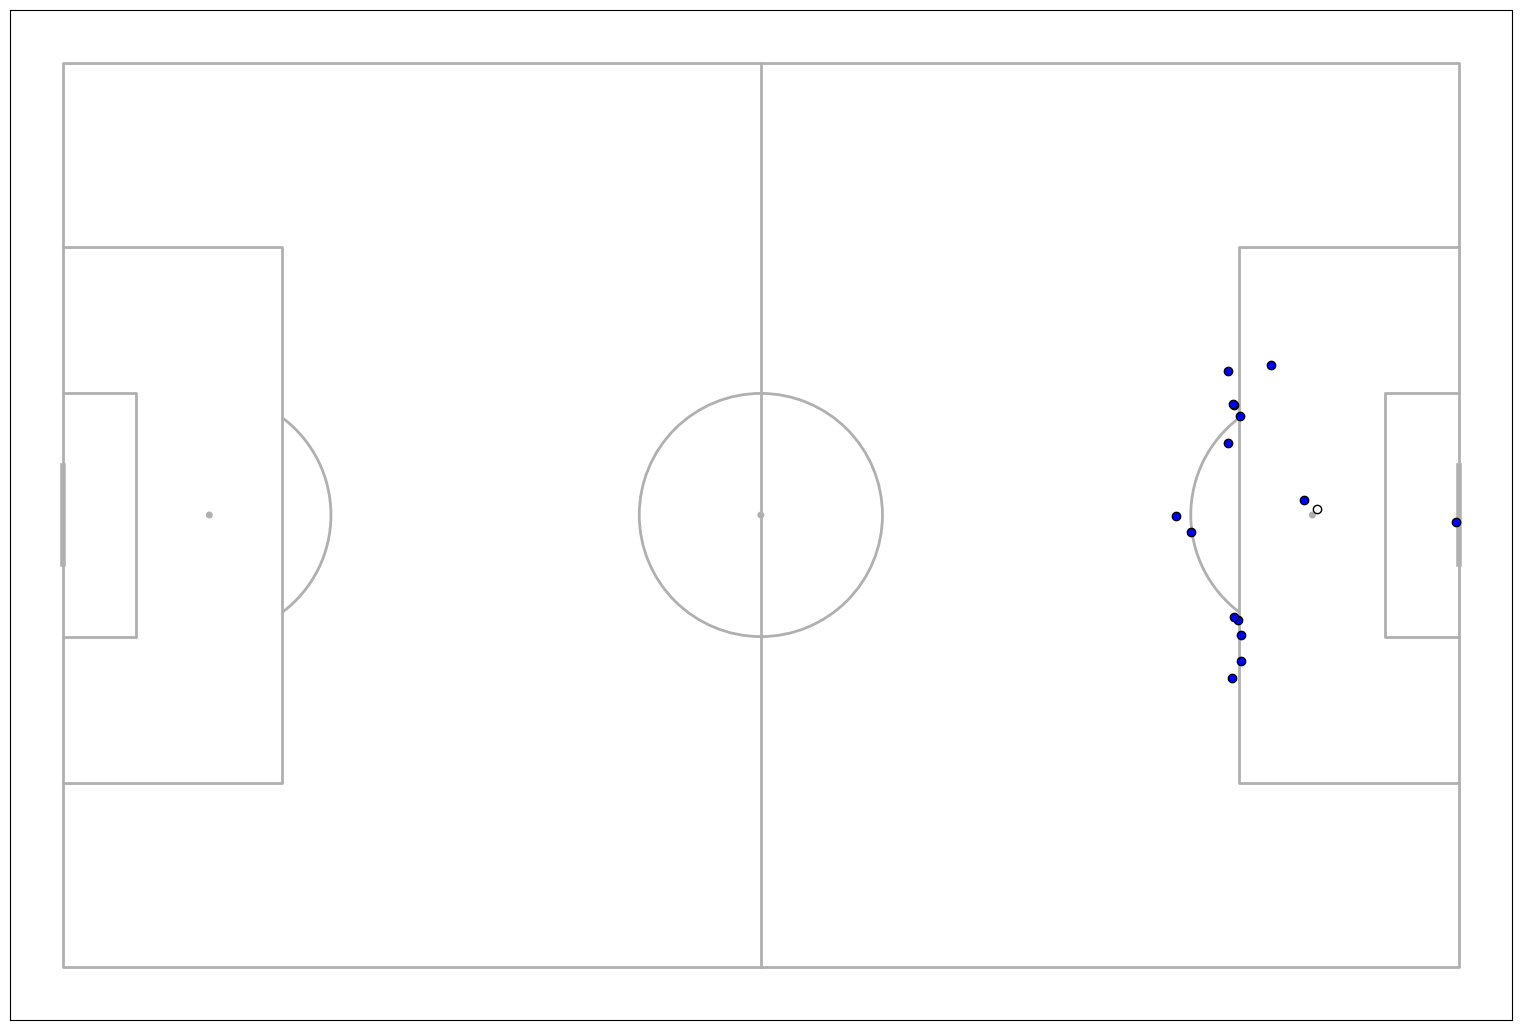

In [132]:
find_valid_frame(12427)

17:39.40
17:39.40
17:39.40
17:39.40
17:39.50
17:39.60
17:39.70
17:39.80
17:39.90
17:40.00


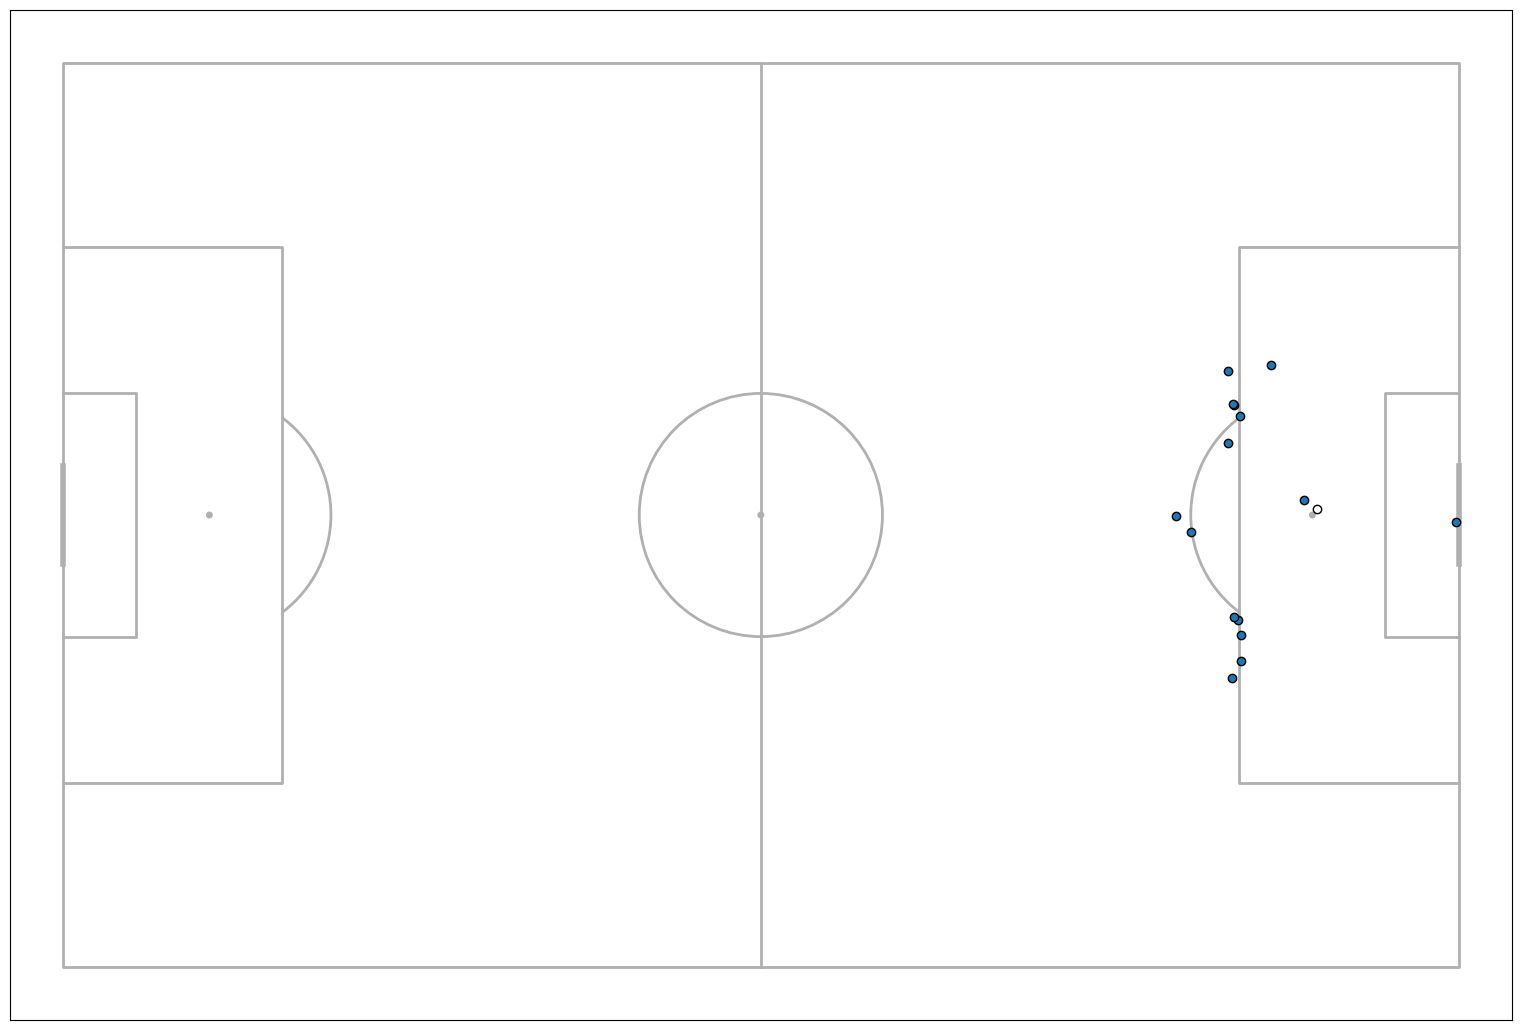

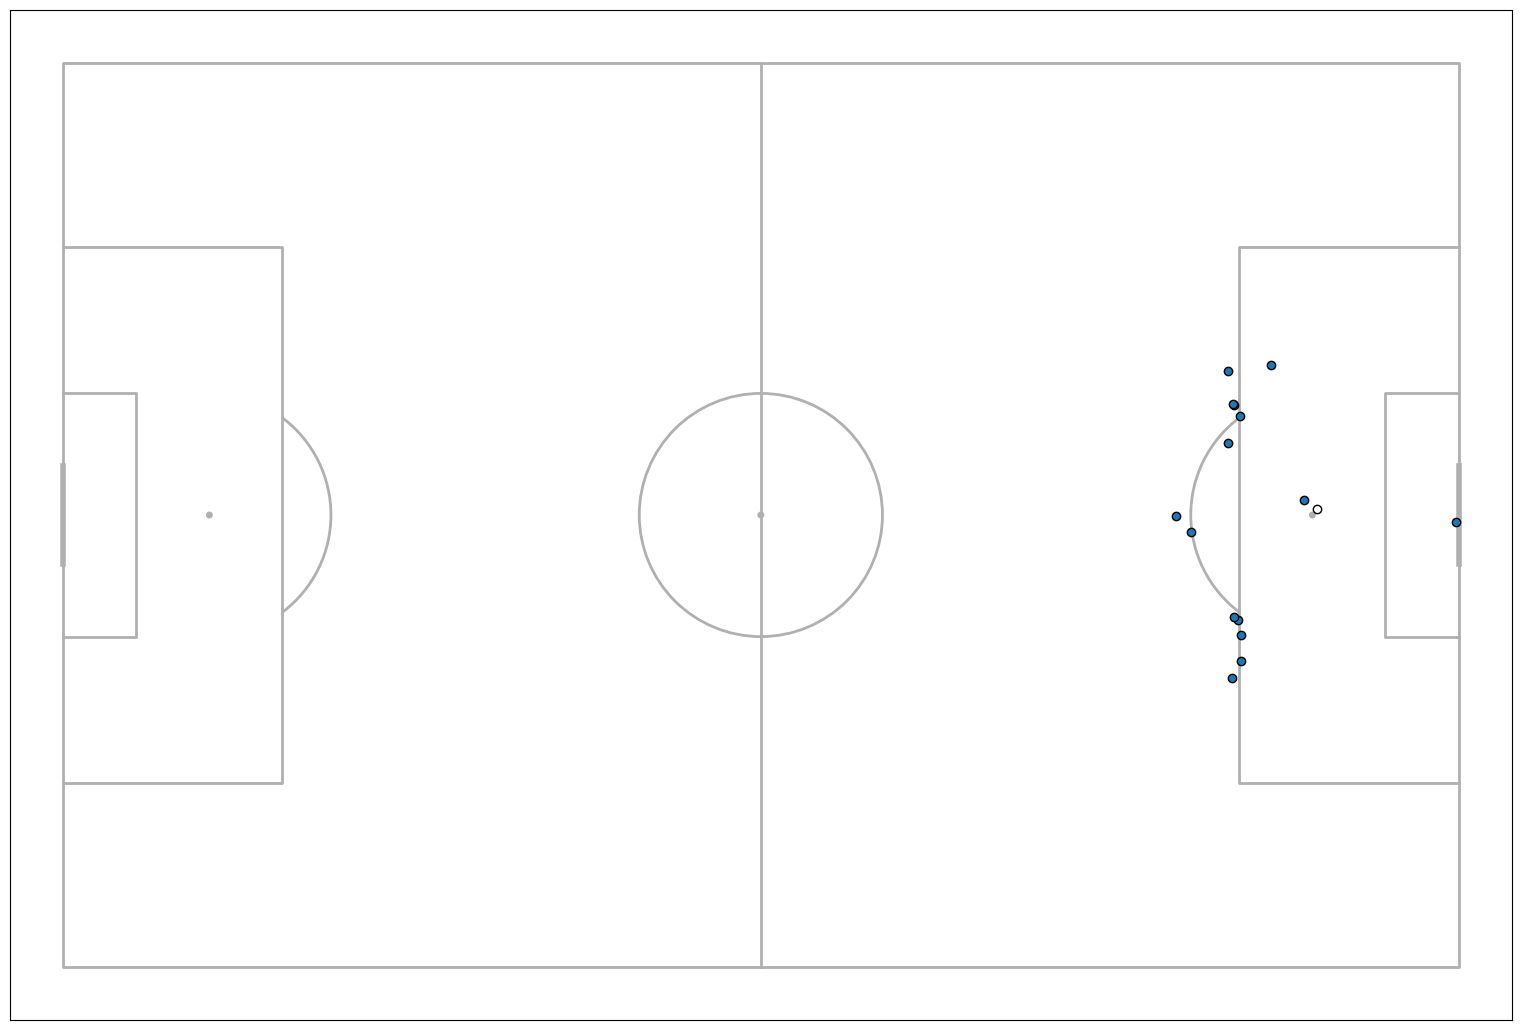

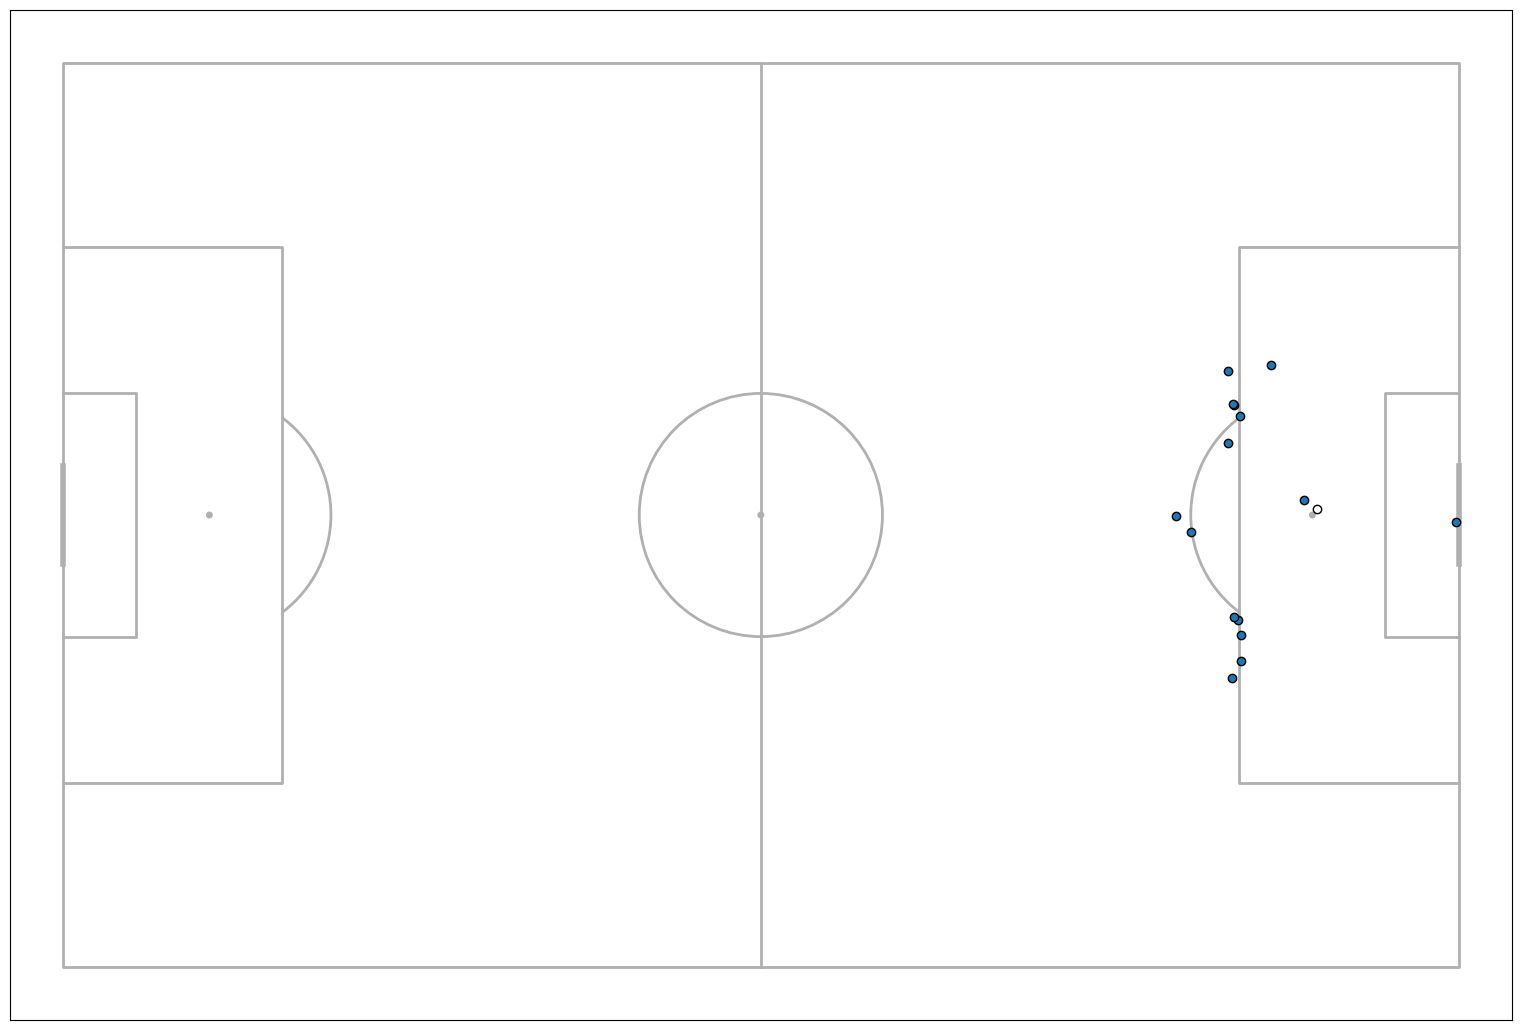

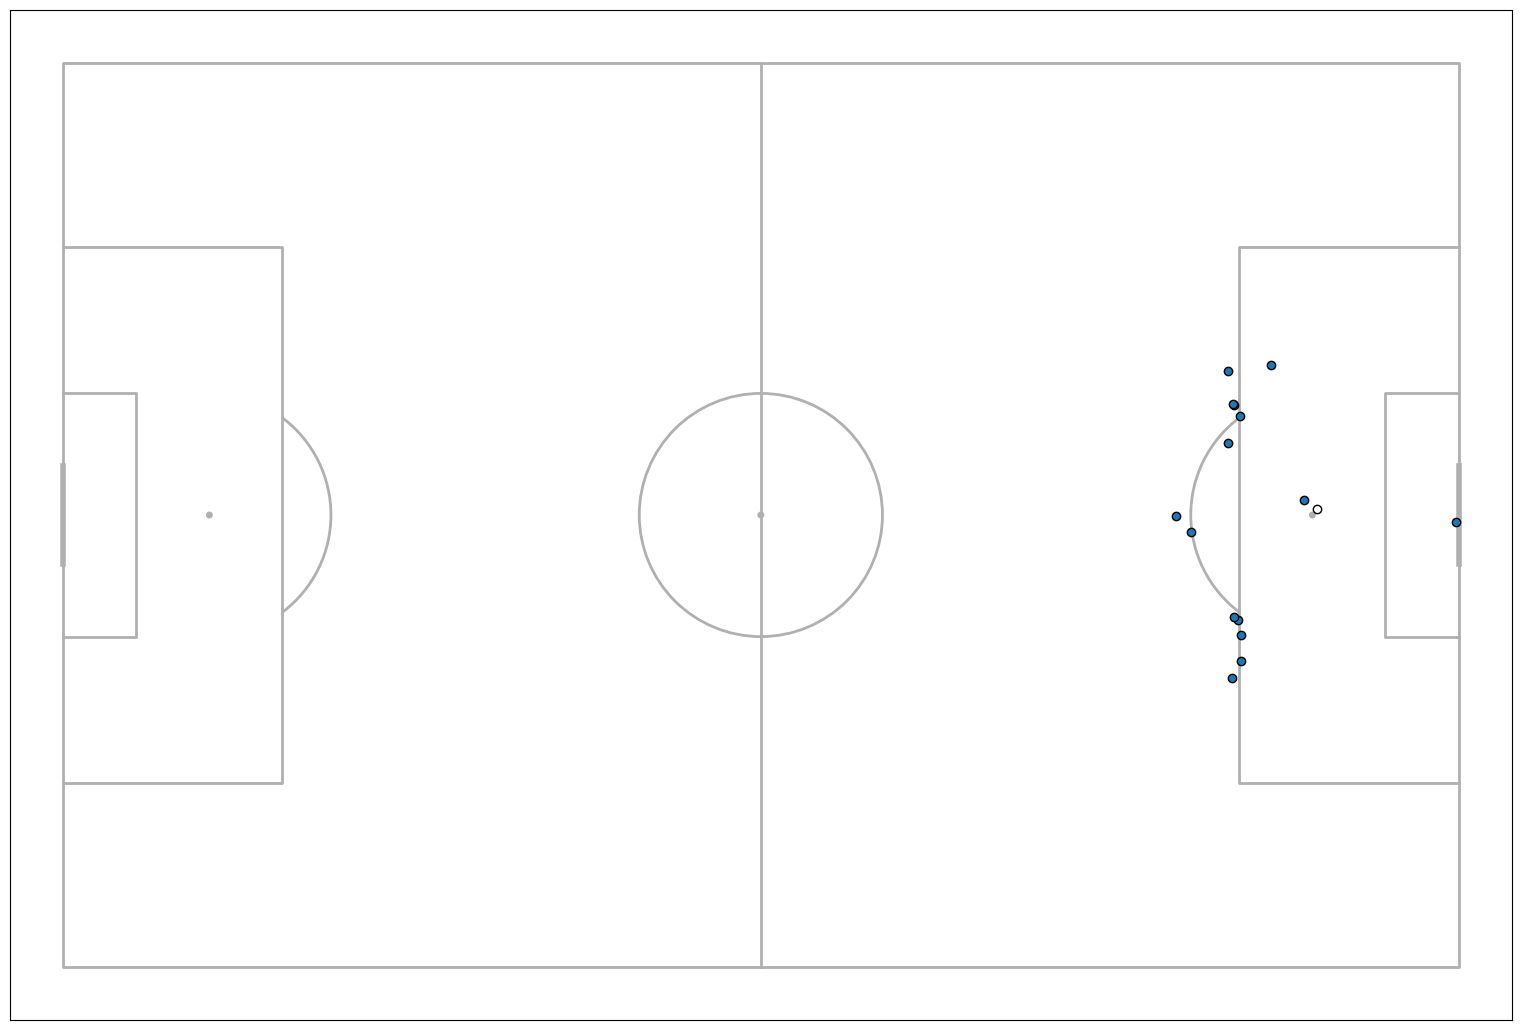

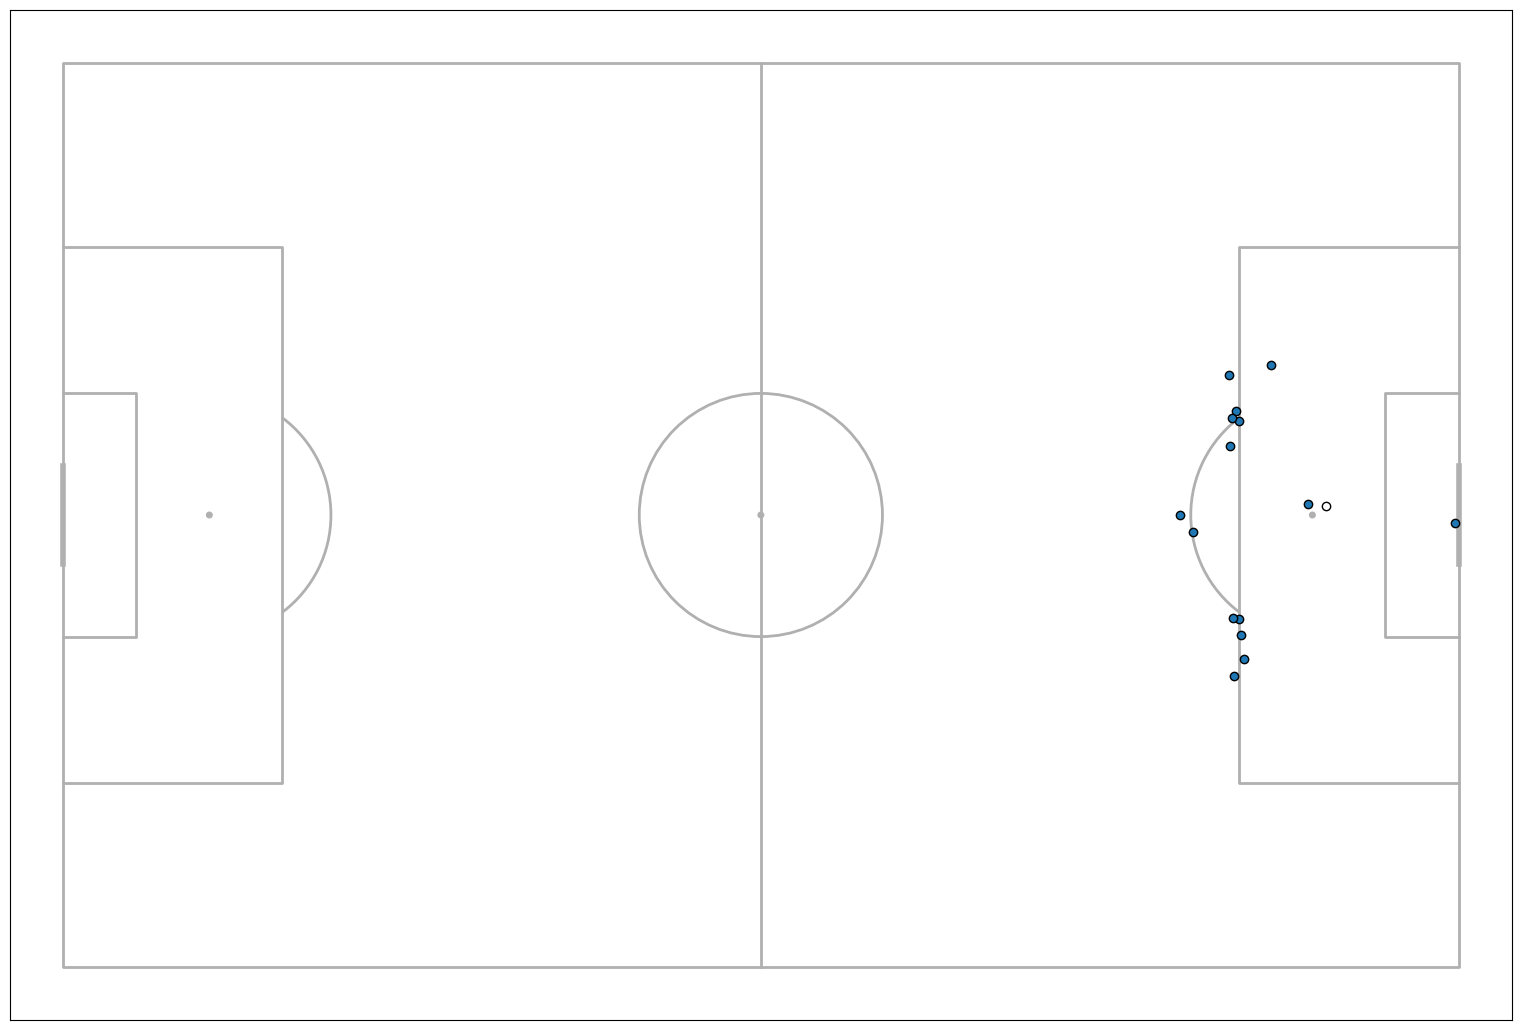

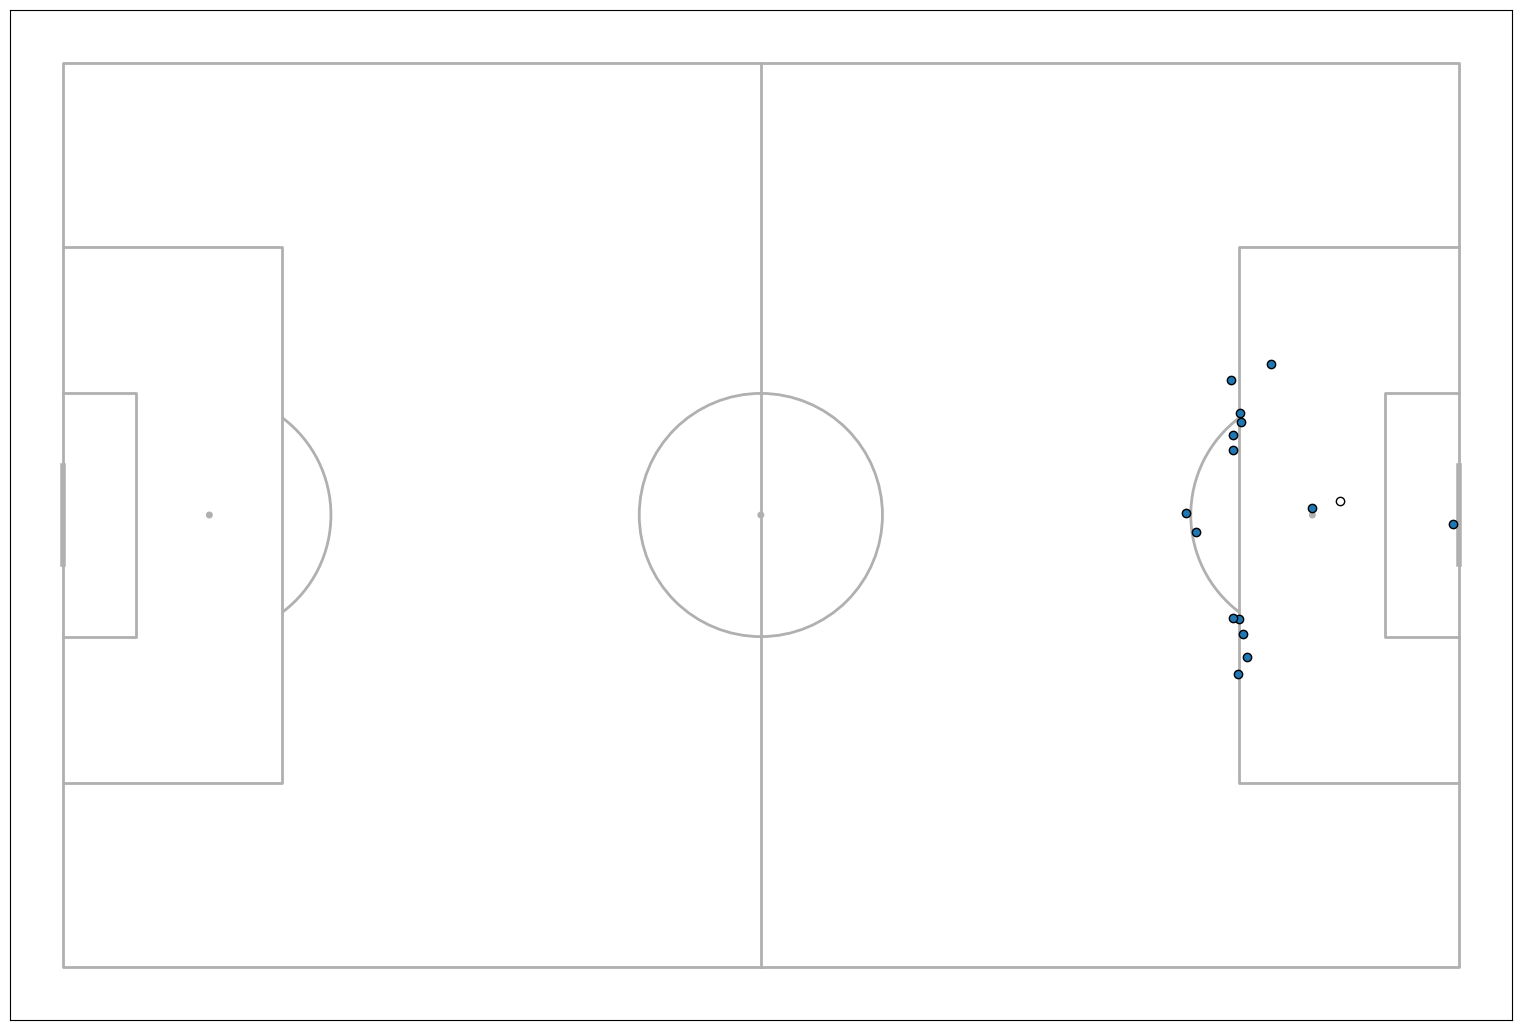

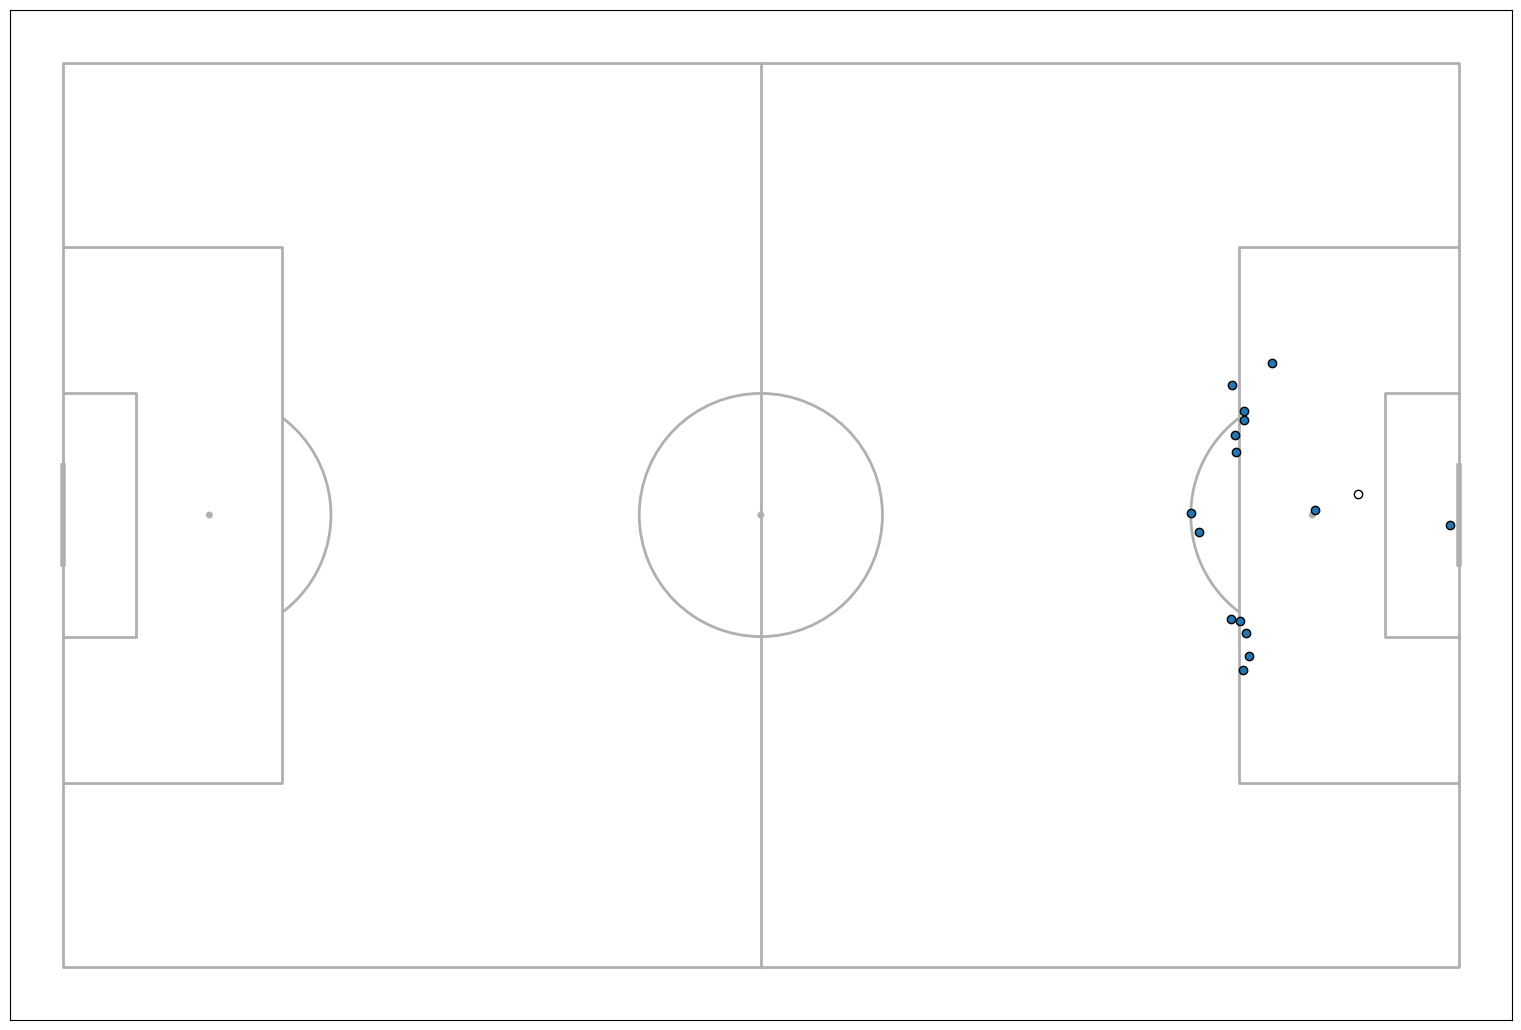

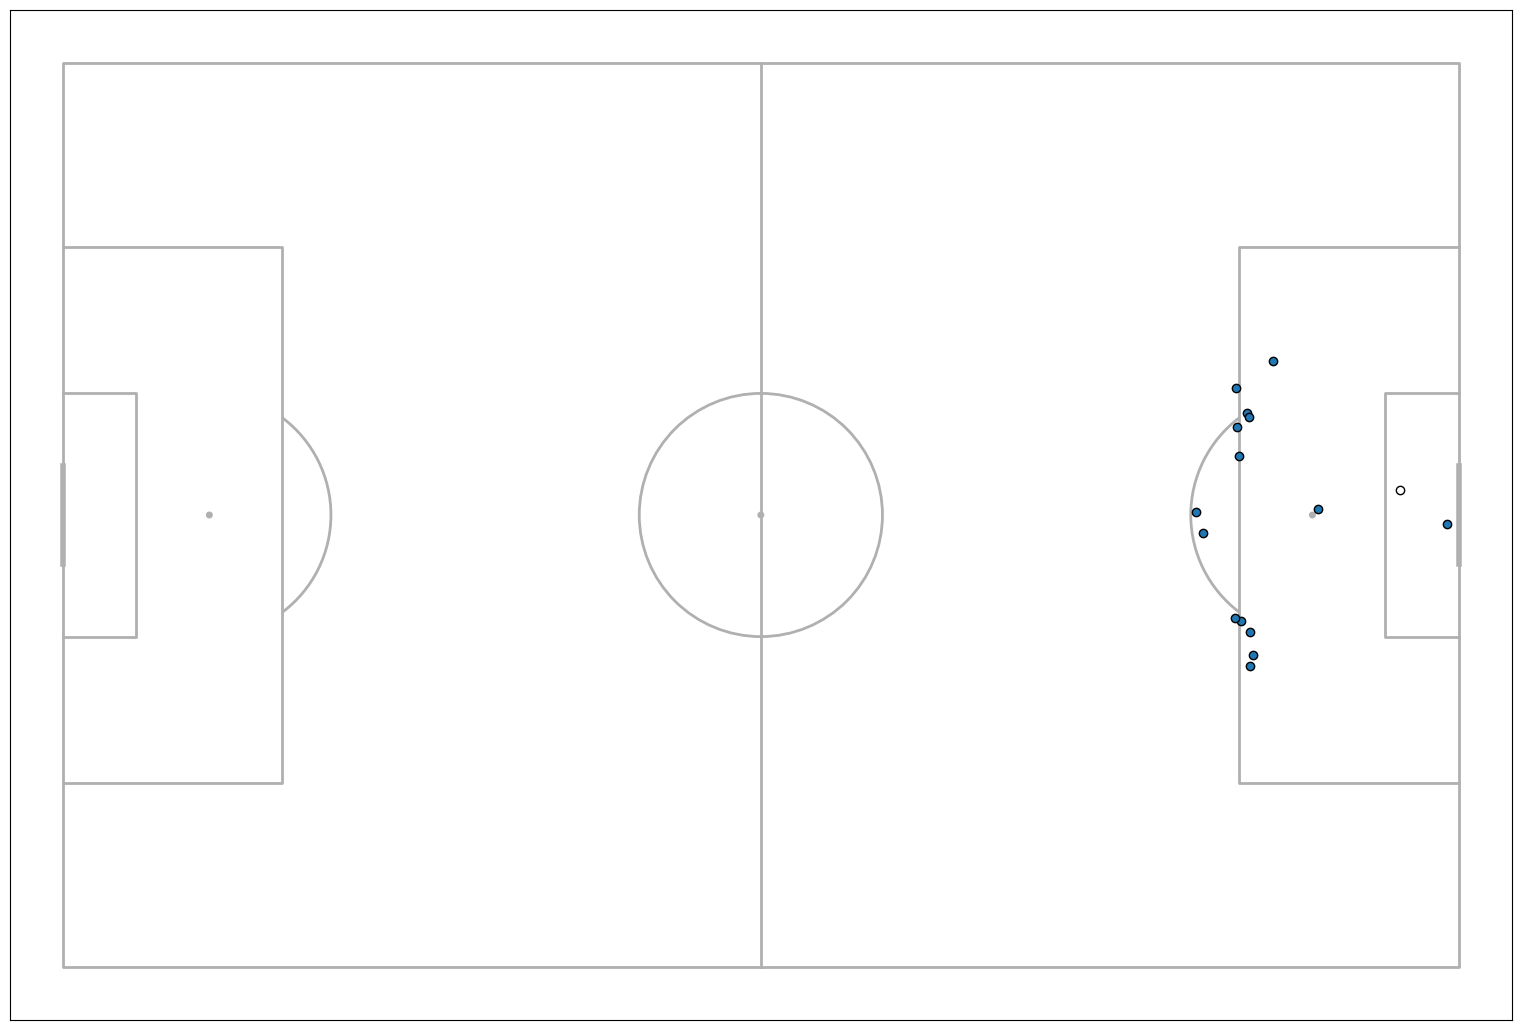

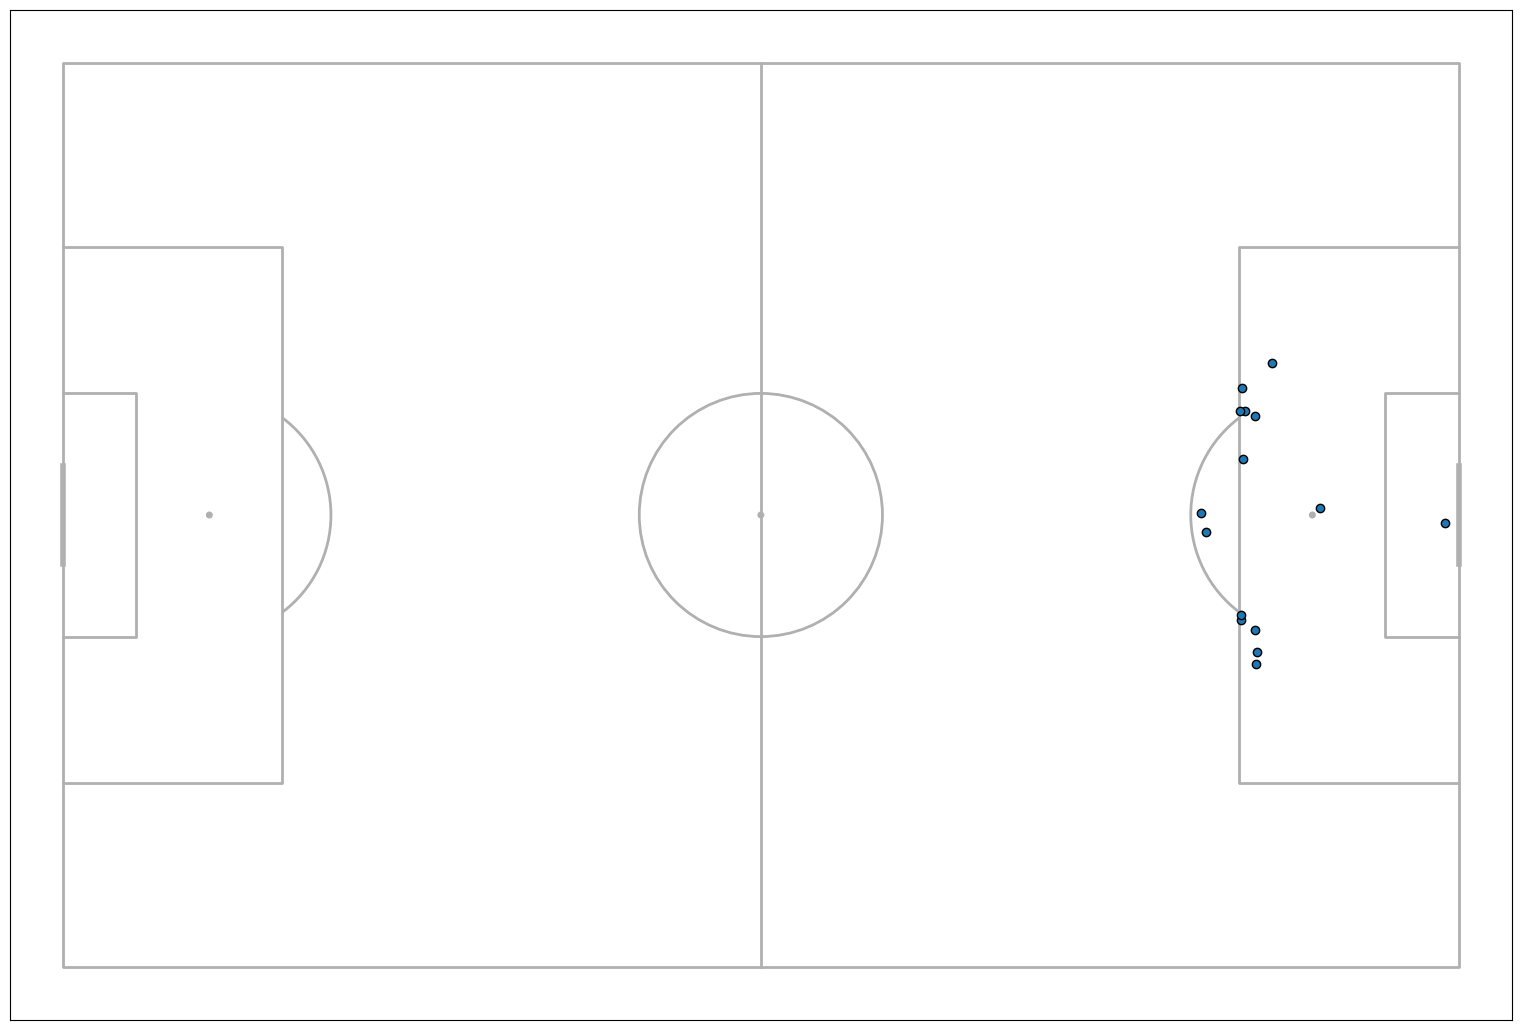

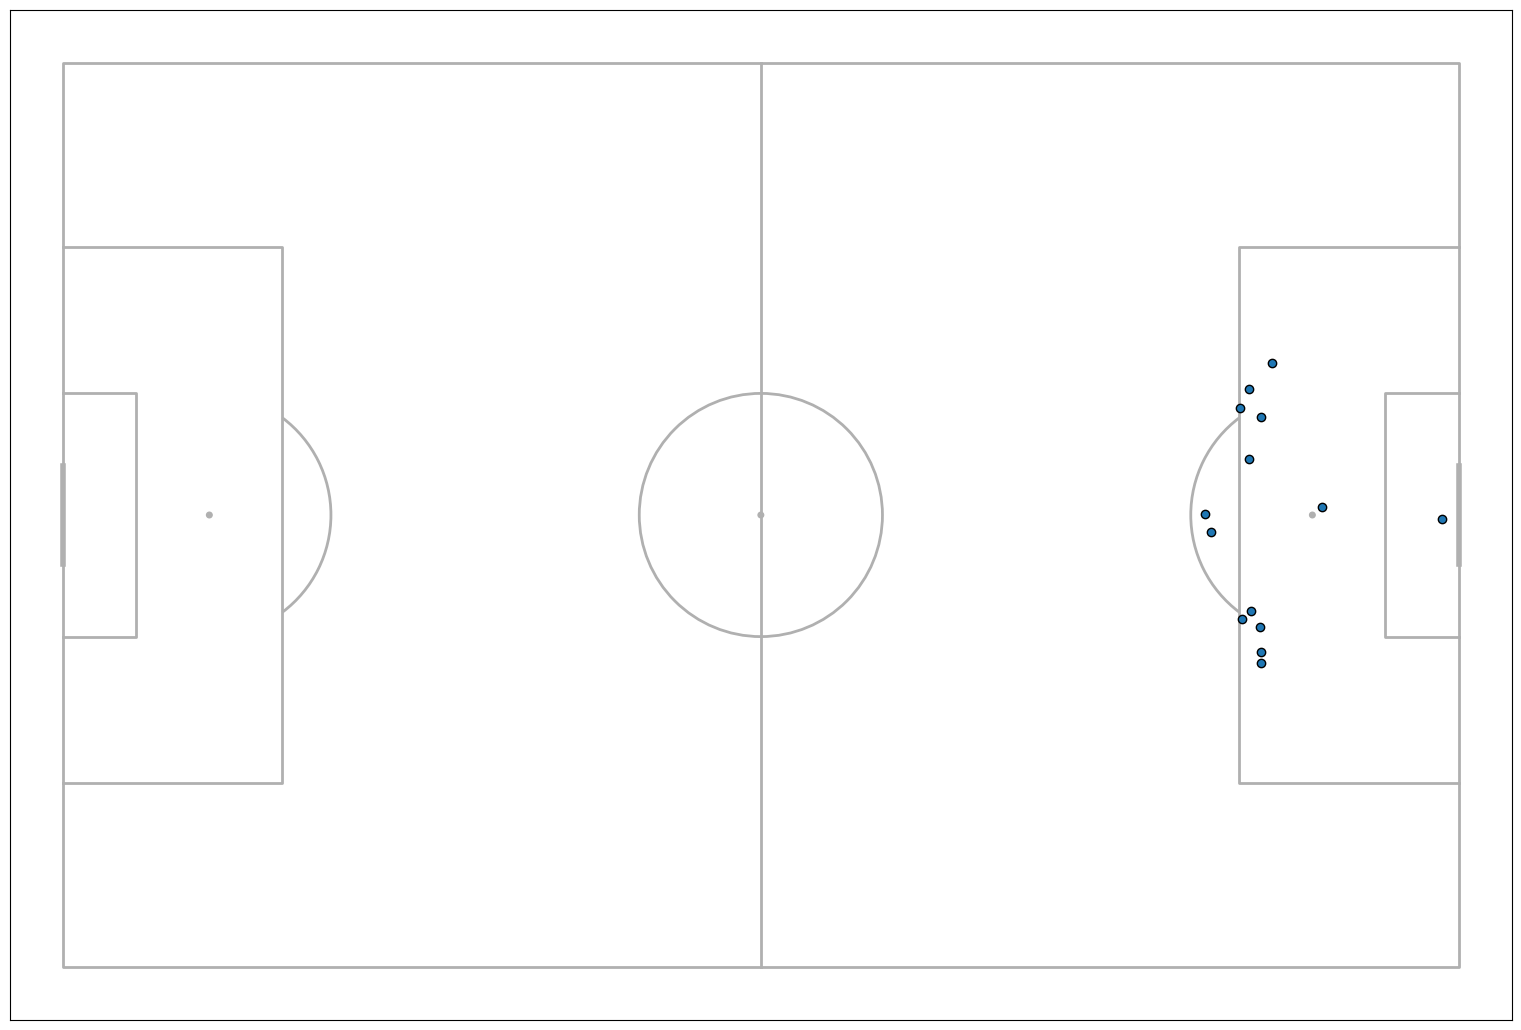

In [139]:
import matplotlib.animation as animation
# ...and set a default so we can view the animation in Colab:
from matplotlib import rc
rc('animation', html='jshtml')
# Now, we have to build an animation object by declaring what we want to animate
anim = animation.FuncAnimation(
 fig, # our "foundation"
 plot_frame, # our "painter" -- our method to plot a given frame
 frames=list(range(12427, 12434)), # what to "paint" with -- the start and end
 interval=100, # how often we want to "paint" in milliseconds per frame (1 di
 blit=True # a default we are overridding for ease of use -- read more about
)
# View our completed animation below:
anim